##  Nonlinear Supervised Learning Series 

# Part 4: Deep feedforward neural networks

Unlike polynomials and other fixed kernel bases, each element of a neural network basis has internal parameters that can be tuned to change the shape of the basis function considerably.  In our general introduction to nonlinear supervised learning we described *single layer* network elements, which are constructed by shoving a linear combination of input through a single nonlinear function like $\text{tanh}$ or the relu function.  In this post we detail multi-layer networks - often called *deep feedforward neural networks*.  We begin by describing deep networks in the context of our previous discussion, as a particular catalog of nonlinear functions used for nonlinear supervised learning problems.  We then turn to describe these network elements from a computational perspective, so that we can more easily see how to effectively compute with them. 

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../../mlrefined_datasets/nonlinear_superlearn_datasets/'
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Deep feedforward neural networks



## Single-layer bases units

Starting with the simple case of scalar input, a single-layer neural network basis function takes the form 

\begin{equation}
f\left(x\right)=a\left(w_0+w_1\,x\right)
\end{equation}

where $a\left(\cdot\right)$ is the nonlinear mathematical function (referred to in the parlance of neural networks as an *activation function*), and $w_0$ and $w_1$ are tunable weights.  For example $a\left(\cdot\right)$ can be $\text{tanh}(\cdot)$ or the rectified linear unit $\text{max}\left(0,\cdot\right)$.

Because each single-layer network function has *tunable internal parameters* a single element can take on a variety of shapes.  For example, in the Python cell below we plot four instances of a single $\text{tanh}(\cdot)$ element.  In each instance the internal parameters of this element have been set randomly, giving each instance a distinct shape.

<IPython.core.display.Javascript object>


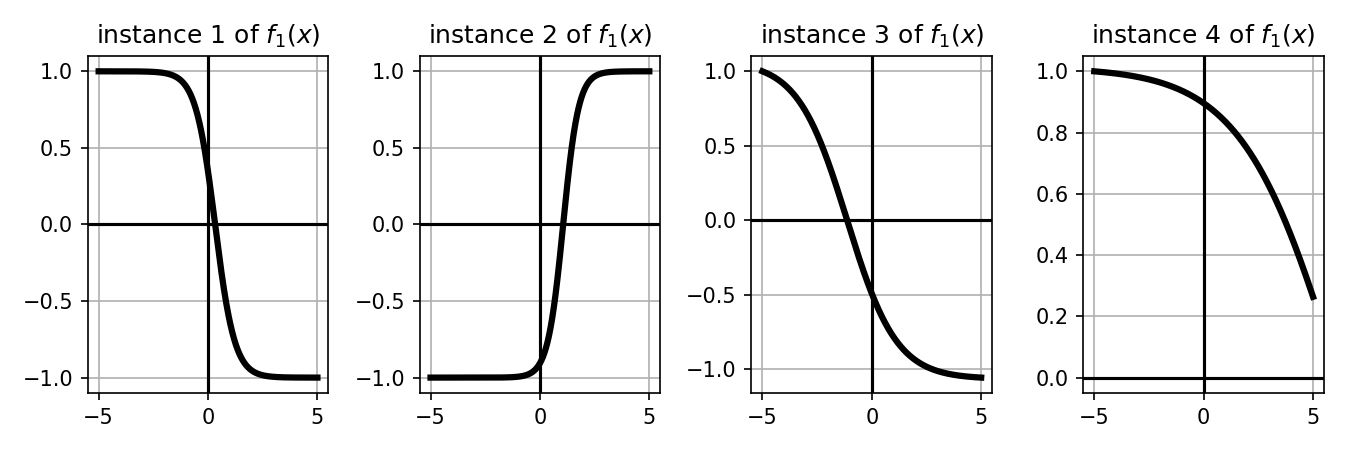

In [2]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 1,activation = 'tanh')

In Figure 1 we draw the computation graph of $f\left(x\right)$ of a general single-layer element given in equation (1). 

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/single_layer_scalar_basis.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 1:</strong> <em> Computational graph for the single-layer neural network basis function in equation (1).</em>
</figcaption>
</figure>

Extending equation (1) to the case where the input is more generally $N$ dimensional is straightforward: each dimension gets its own tunable parameter  

\begin{equation}
f\left(x_1,x_2,\ldots,x_N\right)=a\left(w_0+\underset{n=1}{\overset{N}{\sum}}{w_n\,x_n}\right)
\end{equation}

with the corresponding computation graph shown below in Figure 2.

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/single_layer_vector_basis.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 2:</strong> <em> Computational graph for the single-layer neural network basis function in (2) where the input is $N$ dimensional.</em>
</figcaption>
</figure>

Putting the inputs and weights into the vectors $\mathbf{x}$ and $\mathbf{w}$, defined respectively as 

\begin{equation}
\mathbf{x}=\left[\begin{array}{c}
1\\
x_{1}\\
\vdots\\
x_{N}
\end{array}\right], \qquad
\mathbf{w}=\left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{N}
\end{array}\right]
\end{equation}

we can write the single-layer basis function in equation (2) more compactly as

\begin{equation}
f\left(\mathbf{x}\right)=a\left(\mathbf{w}^T\mathbf{x}\right)
\end{equation}

and replace the computation graph in Figure 2 with a more compact version shown in Figure 3. 

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/single_layer_vector_basis_compact.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 3:</strong> <em>The equivalent compact form of the computational graph in Figure 2. </em>
</figcaption>
</figure>

## Single -layer networks

Having seen both the algebraic form and the computation graph of a single-layer basis function, we are now ready to form a more general network by simply taking a linear combination of these basis functions.  For example, using $U$ such functions with the relu activation would give us 

\begin{equation}
w_{0,0}+\underset{u=1}{\overset{U}{\sum}}{w_{0,1,u}\text{max}\left(0, \mathbf{w}_{1,u}^T\,\mathbf{x}\right)}
\end{equation}

More generally with a generic activation function $a\left(\cdot \right)$ a single-layer network with $U$ units is the linear combination of $U$ basis functions, plus a bias term, and can be written as

\begin{equation}
w_{0,0}+\underset{u=1}{\overset{U}{\sum}}{w_{0,1,u}\,a\left(\mathbf{w}_{1,u}^T\,\mathbf{x}\right)}
\end{equation}

whose computation graph is shown in Figure 4.

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/single_layer_network.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 4:</strong> <em> Computational graph for the single-layer neural network in equation (5). This network is made up of single-layer basis functions (gray box) shown previously in Figure 3.</em>
</figcaption>
</figure>

Once again we have so many weights that it is helpful to re-notate, to express what we have just seen in a less cumbersome manner.  This will also help us significantly simplify the associated computation graph (key to helping us understand how computation flows in such a complicated function).

A proper re-organization of weights allows us to write (5) more conveniently. Denote by $\mathbf{W}_1$, the $\left(N+1\right)\times U$ matrix

\begin{equation}
\mathbf{W}_{1}=\left[\begin{array}{cccc}
\mathbf{w}_{1,1} & \mathbf{w}_{1,2} & \cdots & \mathbf{w}_{1,U}\end{array}\right]
\end{equation}

by $\mathbf{w}_0$, the $\left(U+1\right)\times 1$ vector

\begin{equation}
\mathbf{w}_{0}=\left[\begin{array}{c}
w_{0,0}\\
w_{0,1,1}\\
\vdots\\
w_{0,1,U}
\end{array}\right]
\end{equation}

and by $\mathbf{a}$, the vector function that takes in a general $d$ dimensional vector $\mathbf{v}$ and returns as output, the $d+1$ dimensional vector 

\begin{equation}
\mathbf{a}\left(\mathbf{v}\right)=\left[\begin{array}{c}
1\\
a\left(v_{1}\right)\\
\vdots\\
a\left(v_{d}\right)
\end{array}\right]
\end{equation}

Using (6-8) we can write the single-layer network in (5) as

\begin{equation}
\mathbf{w}_0^T\,\mathbf{a}\left(\mathbf{W}_1^T\,\mathbf{x}\right)
\end{equation}

This compact algebraic form has a corresponding compact computation graph shown in Figure 5.

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/single_layer_network_compact.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 5:</strong> <em> Equivalent compact form of the computational graph in Figure 4.</em>
</figcaption>
</figure>

## Multi-layer basis units

## Multi-layer networks

With the single-layer network at hand, we can construct more complex networks via matrix multiplication and composition of activation functions. For instance, by replacing $\mathbf{x}$ in (9) with $\mathbf{a}\left(\mathbf{W}_2^T\,\mathbf{x}\right)$, where $\mathbf{W}_2$ is a matrix containing the tunable weights of the second layer, we can create a 2-layer network whose algebraic form is given by

\begin{equation}
\mathbf{w}_0^T\,\mathbf{a}\left(\mathbf{W}_1^T\,\mathbf{a}\left(\mathbf{W}_2^T\,\mathbf{x}\right)\right)
\end{equation}

and whose computation graph is shown in Figure 6. 



<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/2_layer_network_compact.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 6:</strong> <em> Computational graph for a 2-layer neural network.</em>
</figcaption>
</figure>

In general, a neural network with $L$ layers takes the algebraic form in equation (11) and the graphical form shown in Figure 7.

\begin{equation}
\mathbf{w}_0^T\,\mathbf{a}\left(\mathbf{W}_1^T\,\cdots\, \mathbf{a}\left(\mathbf{W}_{L-1}^T\,\mathbf{a}\left(\mathbf{W}_{L}^T\,\mathbf{x}\right)\right)\right)
\end{equation}

<figure>
<img src="../../mlrefined_images/nonlinear_superlearn_images/L_layer_network_compact.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 7:</strong> <em> Computational graph for an $L$-layer neural network. </em>
</figcaption>
</figure>

A neural network with $L>2$ is usually referred to as a 'deep' network. The recursive nature of deep networks, as can be seen in equation (11) allows for their quick and easy implementation in Python, as shown in the code cell below.

In [39]:
import numpy as np

# x is the N-dimensional input array
# L is the number of layers in the network
# W is a dictionary of L weight matrices, one for each layer 
# w0 is a weight vector

def FFNN(x, L, W, w0):
    
    in_put = np.append([1], x)
    
    for j in range(L,0,-1):
        in_put = np.dot(W[str(j)].T, in_put)
        out_put = np.tanh(in_put)
        out_put = np.append([1], out_put)

    return np.dot(w0.T, out_put)